### My First ANN

In [ ]:
# Mount the Google-Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The CIFAR-10 are labeled tiny images [dataset](http://www.cs.toronto.edu/~kriz/cifar.html). They were collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton. There are total 10 classes as shown below. We will use neural networks for classification

### Import Dependencies

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense,Flatten, Dropout
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# Display the version
print(tf.__version__)

2.15.0


In [ ]:
#load the dataset
(X_train, y_train),(X_test, y_test)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 37s 0us/step


In [ ]:
#shape of train/test dataset
X_train.shape

(50000, 32, 32, 3)

In [ ]:
#shape of train/test dataset
y_train.shape

(50000, 1)

In [ ]:
#shape of train/test dataset
X_test.shape

(10000, 32, 32, 3)

In [ ]:
#shape of train/test dataset
y_test.shape

(10000, 1)

In [ ]:
#check the target class via index
y_train[:9]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8]], dtype=uint8)

In [ ]:
y_train.ndim

2

In [ ]:
#reshape y_train from 2D to 1D
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1)
print(y_train[:10])
# print(y_test[:10]

[6 9 9 4 1 1 2 7 8 3]


In [ ]:
y_train.ndim

1

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'), #H1
        layers.Dense(1000, activation='relu'), #H2
        layers.Dense(500, activation='relu'),  #H3
        layers.Dense(100, activation='relu'),  #H4
        layers.Dense(10, activation='softmax') #OL
    ])

In [ ]:
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_2 (Dense)             (None, 500)               500500    
                                                                 
 dense_3 (Dense)             (None, 100)               50100     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 12771610 (48.72 MB)
Trainable params: 1277

In [ ]:
ann_hist = ann.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 11s 6ms/step - loss: 1.8337 - accuracy: 0.3415 - val_loss: 1.7231 - val_accuracy: 0.3797
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6313 - accuracy: 0.4187 - val_loss: 1.6204 - val_accuracy: 0.4196
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5409 - accuracy: 0.4530 - val_loss: 1.5097 - val_accuracy: 0.4567
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4754 - accuracy: 0.4762 - val_loss: 1.4709 - val_accuracy: 0.4749
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4220 - accuracy: 0.4945 - val_loss: 1.4583 - val_accuracy: 0.4891
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3740 - accuracy: 0.5138 - val_loss: 1.5330 - val_accuracy: 0.4631
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3323 - accuracy: 0.5267 - val_loss: 1.4058 - val_accuracy

In [ ]:
# Save the model
ann.save('ann_v1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# convert the history.history dict to a pandas DataFrame:
history_df = pd.DataFrame(ann_hist.history)

# save dataframe as csv file
history_df.to_csv('ann_history.csv', encoding='utf-8', index=False)

In [ ]:
# list all data in history
print(ann_hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


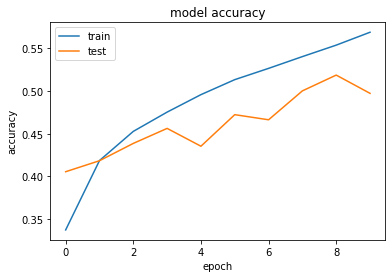

In [ ]:
# summarize history for accuracy
plt.plot(ann_hist.history['accuracy'])
plt.plot(ann_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

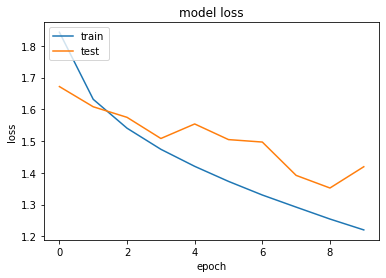

In [ ]:
# summarize history for loss
plt.plot(ann_hist.history['loss'])
plt.plot(ann_hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_pred = ann.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred.shape

(10000, 10)

In [ ]:
y_pred_classes = [np.argmax(element) for element in y_pred]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

cm = confusion_matrix(y_test, y_pred_classes)

print("Confusion matrix of a Simple ANN: \n", cm)

313/313 [==============================] - 1s 2ms/step
Confusion matrix of a Simple ANN: 
 [[731   8  79  24  17  12   9   9  98  13]
 [149 442  24  38  16  17  13  15 129 157]
 [120   5 571  82  89  40  46  20  17  10]
 [ 79   5 183 396  48 140  71  21  24  33]
 [ 89   2 305  71 386  19  64  33  24   7]
 [ 48   4 190 243  60 347  43  26  29  10]
 [ 21   4 198 110  96  37 496   6  18  14]
 [ 85   2 143  81 108  70  21 429  24  37]
 [194  21  25  27  22   9   3   9 655  35]
 [126  77  25  63  19  20  17  36  96 521]]


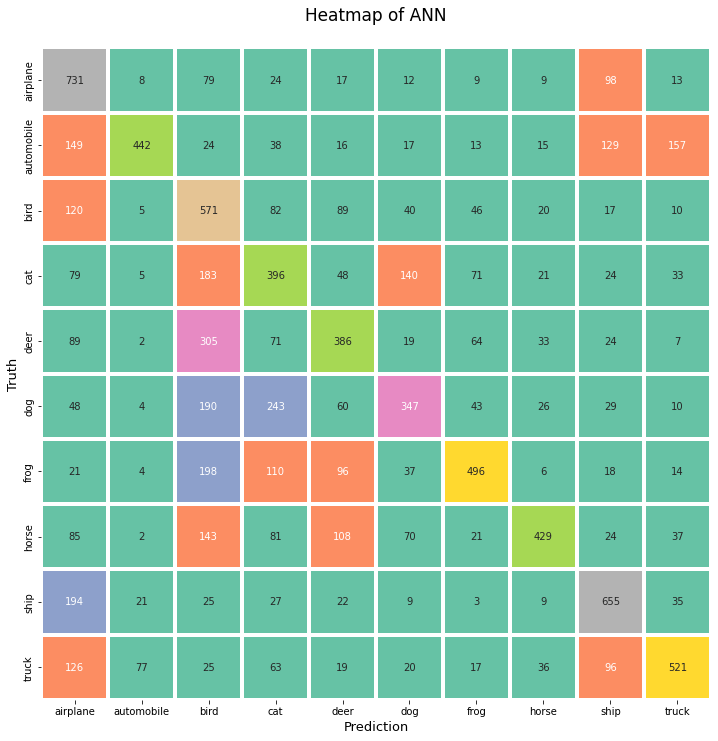

In [ ]:
#  Visualization
plt.figure(figsize = (12,12))
sns.heatmap(cm, annot = True, fmt = 'd', cmap='Set2', cbar=False, linewidths=3).set(xticklabels = classes, yticklabels = classes)
plt.title("Heatmap of ANN\n", size = 17)
plt.xlabel("Prediction", size = 13)
plt.ylabel("Truth",  size = 13)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report of CNN: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report of CNN: 
               precision    recall  f1-score   support

           0       0.45      0.73      0.55      1000
           1       0.78      0.44      0.56      1000
           2       0.33      0.57      0.42      1000
           3       0.35      0.40      0.37      1000
           4       0.45      0.39      0.41      1000
           5       0.49      0.35      0.41      1000
           6       0.63      0.50      0.56      1000
           7       0.71      0.43      0.53      1000
           8       0.59      0.66      0.62      1000
           9       0.62      0.52      0.57      1000

    accuracy                           0.50     10000
   macro avg       0.54      0.50      0.50     10000
weighted avg       0.54      0.50      0.50     10000

